<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/Pytorch_01_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


### Создадим модель

In [2]:
what_were_covering = {1:"data (prepare and load)",
                      2: "build model",
                      3: "fit model",
                      4: "making predictions",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [3]:
from torch import nn #содержит все строительные блоки для построения нейронной сети

In [4]:
torch.__version__

'1.13.1+cu116'

In [5]:
#Данные могут быть любыми, абсолютно

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)

In [7]:
y = weight*X+ bias

In [8]:
len(X), len(y)

(50, 50)

In [9]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

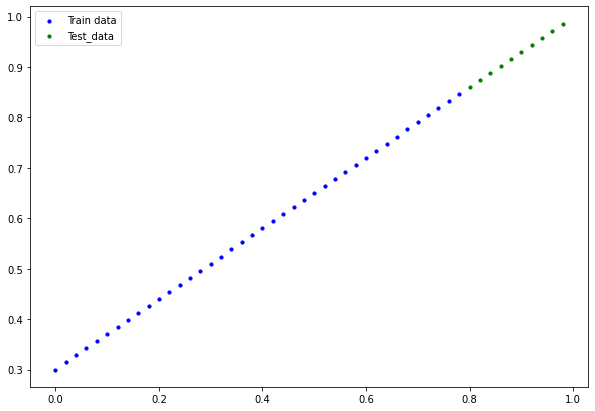

In [10]:
def plot_predictions(x_tr = X_train,
                     y_tr = y_train,
                     x_t = X_test,
                     y_t = y_test,
                     pred = None):
    plt.figure(figsize = (10, 7))
    plt.scatter(x_tr, y_tr, c = "b", s = 10,label = "Train data")
    plt.scatter(x_t, y_t, c = "g", s = 10, label = "Test_data")
    if pred is not None:
        plt.scatter(x_t, pred, c = "r", s = 10, label = "Predictions")
    plt.legend()
plot_predictions()

In [11]:
class LinearRegressionModel(nn.Module): #почти все наследуется от nn
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad = True,
                                               dtype= torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [12]:
## torch.nn - содержит всё
## torch.nn.Parameter - параметр модели
## torch.nn.Module - базовый класс
## torch.nn.optim - оптимизаторы
## def forward() - обязательный метод, прогоняет наши данные


In [13]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [16]:
#torch.inference_mode() отключает отслеживание градиента для вывода (работает быстрее)
with torch.inference_mode():
    pred_0 = model_0.forward(X_test)
pred_0

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

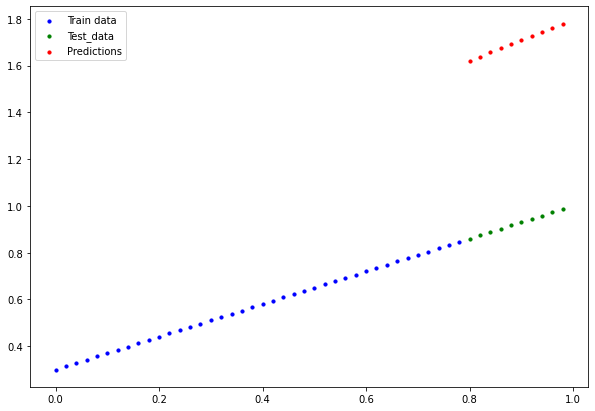

In [17]:
plot_predictions(pred=pred_0)

In [18]:
#обучение модели

In [19]:
loss_function = torch.nn.MSELoss()
loss_function

MSELoss()

In [20]:
loss_function(pred_0, y_test)

tensor(0.6042)

In [21]:
optimizer = torch.optim.SGD(params =model_0.parameters(),
                            lr = 0.001)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [22]:
epochs = 10000
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
    #перевеод модели в режим обучения
    model_0.train() #все параметры требующие градиент, начинают требовать градиент
    #1
    y_pred = model_0(X_train)
    #2
    loss = loss_function(y_pred, y_train)
    #3
    optimizer.zero_grad()
    #4
    loss.backward()
    #5
    optimizer.step()
    model_0.eval()
    if epoch % 10 == 0:
        with torch.inference_mode():
            pred_test = model_0.forward(X_test)
        loss_test = loss_function(pred_test, y_test)
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(loss_test)

In [23]:
with torch.inference_mode():
    pred = model_0.forward(X_test)

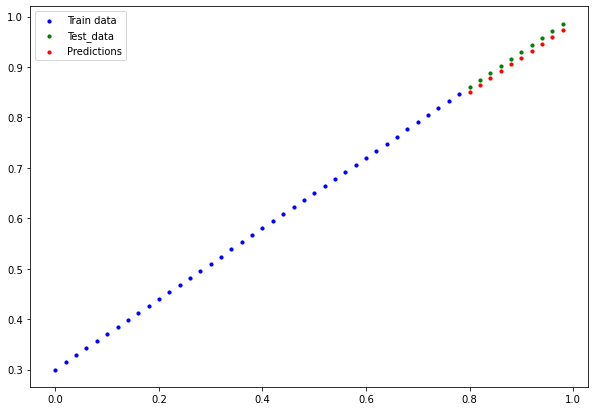

In [24]:
plot_predictions(pred = pred.detach().numpy())

In [25]:
epoch_count = torch.tensor(epoch_count).numpy()
loss_values = torch.tensor(loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

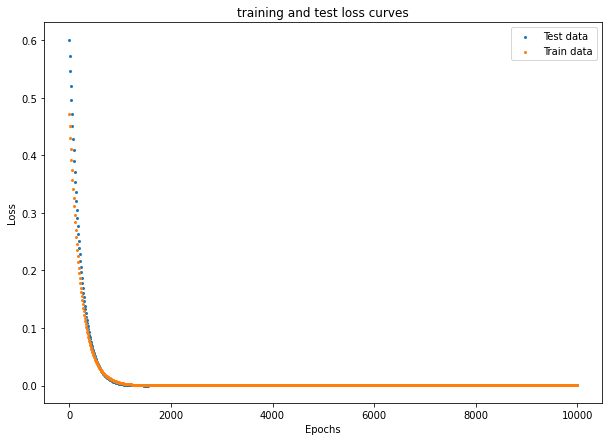

In [26]:
plt.figure(figsize = (10, 7))
plt.scatter(epoch_count,test_loss_values,s = 4, label="Test data")
plt.scatter(epoch_count,loss_values, s=4, label="Train data")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

###Сохранение модели в PyTorch


In [27]:
#pickle 
#1.torch.save()
#2.torch.load()
#3.torch.nn.Module.load_state_dict()

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6764])), ('bias', tensor([0.3097]))])

In [29]:
from torch.nn.modules.module import T
#saving
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

#create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

#save state_dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [30]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Mar 13 10:53 01_pytorch_workflow_model_0.pth


### Загрузка модели

In [31]:
loaded_model_0 = LinearRegressionModel()
#загрузим обученные пармаетры
loaded_model_0.state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [32]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6764])), ('bias', tensor([0.3097]))])

In [33]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    model_preds = model_0(X_test)
print((loaded_model_preds==model_preds).float().mean())

tensor(1.)


### Улучшим модель

In [34]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [35]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [36]:
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight*X+bias

In [37]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

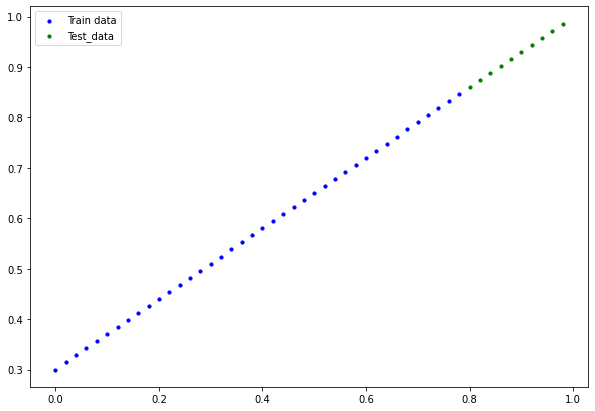

In [38]:
plot_predictions()

In [39]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #nn.Linear() для создания парметров модели
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1.to(device)
list(model_1.parameters())

In [49]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [51]:
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.0001)

In [84]:
torch.manual_seed(42)
epochs = 10000
count_epochs = []
loss_value = []
test_loss_value = []
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1.forward(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        if epoch %10==0:
            test_pred = model_1.forward(X_test)
            loss_test_pred = loss_function(test_pred, y_test)
            count_epochs.append(epoch)
            loss_value.append(loss)
            test_loss_value.append(loss_test_pred)

In [86]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7000]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3000], device='cuda:0'))])

In [97]:
count_epochs = np.array(count_epochs)
loss_value = np.array(torch.tensor(loss_value))
test_loss_value = np.array(torch.tensor(test_loss_value))

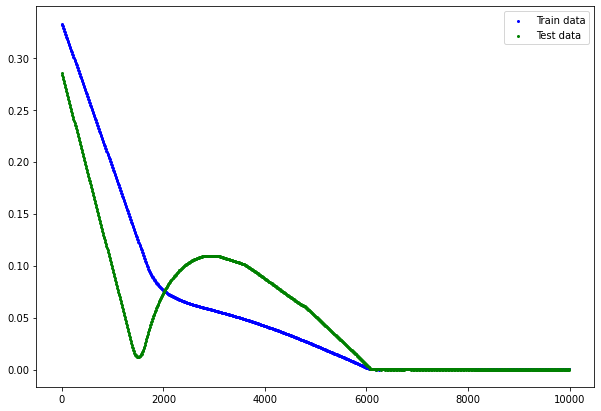

In [99]:
plt.figure(figsize = (10,7))
plt.scatter(count_epochs, 
            loss_value, 
            c = "b", 
            s = 4,
            label = "Train data")
plt.scatter(count_epochs,
            test_loss_value,
            c = "g",
            s = 4,
            label = "Test data")
plt.legend() 

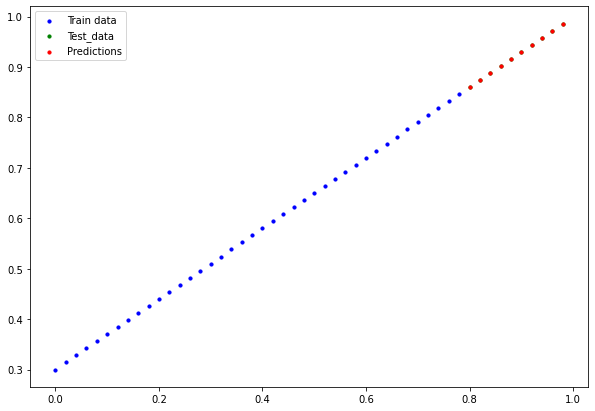

In [102]:
test_preds = model_1.forward(X_test)
plot_predictions(pred=test_preds.cpu().detach())

### Сохраним улучшенную модель

In [111]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH
torch.save(obj=model_1.state_dict(), 
           f=MODEL_SAVE_PATH)

### Заргузим улучшенную модель

In [117]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

list(loaded_model_1.parameters())

[Parameter containing:
 tensor([[0.7000]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.3000], device='cuda:0', requires_grad=True)]